# Imports

In [139]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

from sklearn.neural_network import MLPRegressor

# Helper Functions

In [140]:
def loadImages(folder, limit=None):
    # Make a list of lists of the low res frames and high res frames
    # For each image also relativize the pixel values to be between 0 and 1 (its bw anyways)

    frames = []

    # Iterate through all the files in the folder
    for i, filename in enumerate(os.listdir(folder)):
        # Check if the limit has been reached
        if limit is not None and i >= limit:
            break

        # Load the image
        img = plt.imread(folder + "/" + filename)
        # Relativize the pixel values
        img = img / 255
        # Append the image to the list
        frames.append(img)

    return frames

# Data Preparation

In [141]:
lowResX, lowResY = 128, 128
highResX, highResY = 256, 256

lowResFramesFolder = f"minecraftData/data{lowResX}x{lowResY}"
highResFramesFolder = f"minecraftData/data{highResX}x{highResY}"

# Limit how many frames if needed
limit = 1000

lowResFrames = loadImages(lowResFramesFolder, limit=limit)
highResFrames = loadImages(highResFramesFolder, limit=limit)


# Split the data into X and y
X, y = lowResFrames, highResFrames

# Flatten the frames
X = np.array([frame.flatten() for frame in X])
y = np.array([frame.flatten() for frame in y])

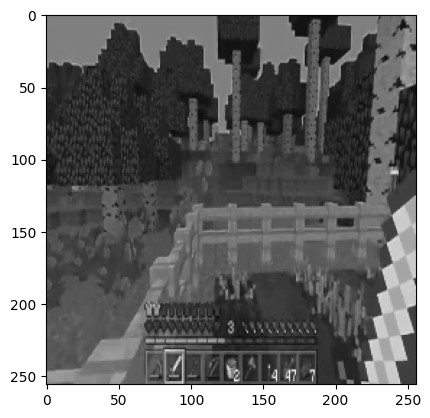

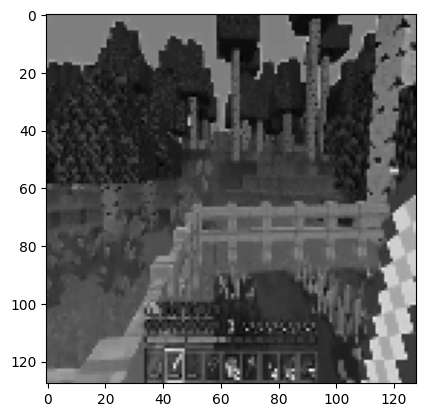

(1000, 16384)


In [142]:
plt.imshow(highResFrames[0], cmap='gray')
plt.show()
plt.imshow(lowResFrames[0], cmap='gray')
plt.show()

print(X.shape)

In [143]:
X[0]

array([0.00156863, 0.00156863, 0.00156863, ..., 0.00079969, 0.00079969,
       0.00079969], dtype=float32)

# Training

In [149]:
model = MLPRegressor(hidden_layer_sizes=(100, 10, 10), verbose=True, tol=0.00001)

model.fit(X, y)

Iteration 1, loss = 0.00007454
Iteration 2, loss = 0.00006856
Iteration 3, loss = 0.00006963
Iteration 4, loss = 0.00007070
Iteration 5, loss = 0.00007126
Iteration 6, loss = 0.00007076
Iteration 7, loss = 0.00006965
Iteration 8, loss = 0.00006808
Iteration 9, loss = 0.00006629
Iteration 10, loss = 0.00006439
Iteration 11, loss = 0.00006258
Iteration 12, loss = 0.00006092
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


MLPRegressor(hidden_layer_sizes=(100, 10, 10), tol=1e-05, verbose=True)

# Testing Predictions

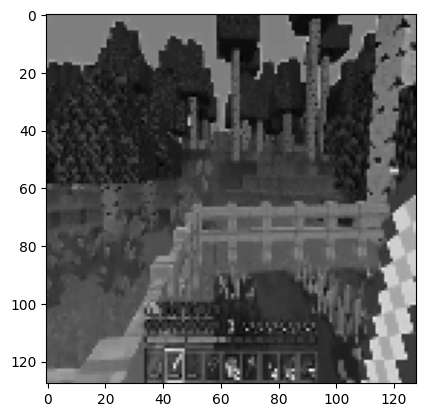

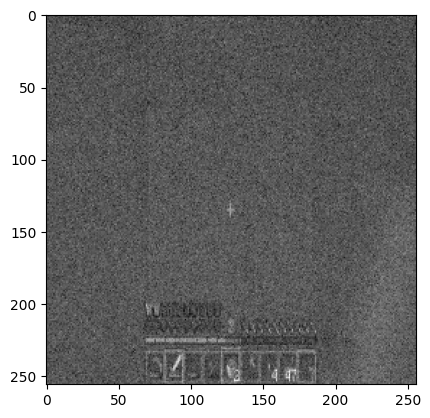

In [150]:
# Make random noise of size lowResX x lowResY px
# noise = np.random.rand(lowResX * lowResY)
noise = X[0]

# Predict the high res frame from the low res frame
highResFramePred = model.predict([noise])

# Reshape the high res frame to be a highResX x highResY image
highResFramePred = highResFramePred.reshape(highResX, highResY)

# Show the low res frame
plt.imshow(noise.reshape(lowResX, lowResY), cmap='gray')
plt.show()

# Show the high res frame
plt.imshow(highResFramePred, cmap='gray')
plt.show()